# Homework 03


## Part 1 - Questions

### Question 1: 

What is the most common vehicle (model and make) - based on the maximum number of vehicles - found in each state, and how does this trend vary among the maximum number of most common vehicles in different states?

* Who (population): vehicle owners in each state
* What (subject, discipline): vehicle preference or popularity
* Where (location): U.S. states
* When (snapshot, longitudinal): Longitudinal - from 1997 to 2024 (entire dataset)
* How much data do you need to do the analysis/work: Data for each vehicle's count or frequency in every state 

### Question 2: 

How has an electric vehicle's range (number of miles an electric vehicle can travel on a fully charged battery or a single charge) changed throughout the years (1997-2024)? Has this range improved or worsened? 

* Who (population): Electric vehicle models available in the market - specifically, the range (miles) of electric vehicle models
* What (subject, discipline): Electric vehicles, environmental science
* Where (location): U.S. states
* When (snapshot, longitudinal): Longitudinal - from 1997 to 2024 (entire dataset)
* How much data do you need to do the analysis/work: Yearly data on the range of electric vehicles from 1997 to 2024 (we will do so by calculating the mean electric ranges of vehicles in each year)


### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

Government agencies, such as Departments of Transportation, research institutions/universities, vehicle manufacturers or environmental/sustainability organizations. Such organizations will most likely have this data on their public site (information on dataset used is mentioned below)

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: Electric Vehicle Population Data
2. Link to Data: https://catalog.data.gov/dataset/electric-vehicle-population-data 
3. Source / Origin: 
	* Author or Creator: Washington State Department of Licensing (DOL)
	* Publication Date: 2022-06-16
	* Publisher: data.wa.gov
	* Version or Data Accessed: 2023-09-14
4. License: http://opendatacommons.org/licenses/odbl/1.0/ (intended for public access and use)
5. Can You Use this Data Set for Your Intended Use Case? Yes!

## Format




### Overview

* Format: csv
* Size: 36.5 MB
* Number of Records: 150483 rows



### Sample of Data




In [158]:
import csv
file_path = 'data/raw/Electric_Vehicle_Population_Data.csv'
file = []
with open(file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    #header = next(csv_reader)
    for row in csv_reader:
        file.append(row)
print(*file[0:6], sep="\n")

['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']
['KM8K33AGXL', 'King', 'Seattle', 'WA', '98103', '2020', 'HYUNDAI', 'KONA', 'Battery Electric Vehicle (BEV)', 'Clean Alternative Fuel Vehicle Eligible', '258', '0', '43', '249675142', 'POINT (-122.34301 47.659185)', 'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)', '53033004800']
['1C4RJYB61N', 'King', 'Bothell', 'WA', '98011', '2022', 'JEEP', 'GRAND CHEROKEE', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Not eligible due to low battery range', '25', '0', '1', '233928502', 'POINT (-122.20578 47.762405)', 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)', '53033021804']
['1C4RJYD61P', 'Yakima', 'Yakima', 'WA', '98908', '2023', 'JEEP', 'GRAND CHEROKEE', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Not


### Fields or Column Headers

* Field/Column 1: VIN (1-10), string
* Field/Column 2: County, string
* Field/Column 3: City, string
* Field/Column 4: State, string
* Field/Column 5: Postal Code, string
* Field/Column 6: Model Year, string
* Field/Column 7: Make, string
* Field/Column 8: Model, string
* Field/Column 9: Electric Vehicle Type, string
* Field/Column 10: Clean Alternative Fuel Vehicle (CAFV) Eligibility,string
* Field/Column 11: Electric Range, string
* Field/Column 12: Base MSRP, string
* Field/Column 13: Legislative District, string
* Field/Column 14: DOL Vehicle ID, string
* Field/Column 15: Vehicle Location, string
* Field/Column 16: Electric Utility, string
* Field/Column 17: 2020 Census Tract, string


## Part 3 - Extract / Transform

Columns I will be extracting/transforming/normalizing from the dataset:

* State: keep values as string values
* Model Year: transform values to an integer
* Make: keep values as string values
* Model: keep values as string values
* Electric Vehicle Type: normalize values from 'Battery Electric Vehicle (BEV)' and 'Plug-in Hybrid Electric Vehicle (PHEV)' to 'BEV' and 'PHEV'
* Clean Alternative Fuel Vehicle (CAFV) Eligibility: normalize values from 'Clean Alternative Fuel Vehicle Eligible', 'Not eligible due to low battery range' and 'Eligibility unknown as battery range has not been researched' to 'Y' (Yes - eligible), 'N' (No - not eligible) and 'Unknown'
* Electric Range: transform values to a float
* Electric Utility: transform values to an integer
* All missing values are located in the 'Electric Utility' column; therefore, missing values are filled in by 0 (integer)


In [159]:
import csv
# Define the file path
file_path = 'data/raw/Electric_Vehicle_Population_Data.csv'

# Initialize dictionaries to store data for each column
data_dict = {
    'State': [],
    'Model Year': [],
    'Make': [],
    'Model': [],
    'Electric Vehicle Type': [],
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': [],
    'Electric Range': [],
    'Electric Utility': []
}

# Open and read the CSV file
with open(file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    header = next(csv_reader)  # Skip the header row
    for row in csv_reader:
        # Extract data for each column and append it to the respective list
        data_dict['State'].append(row[3])
        data_dict['Model Year'].append(int(row[5]))
        data_dict['Make'].append(row[6])
        data_dict['Model'].append(row[7])
        data_dict['Electric Vehicle Type'].append(row[8])
        data_dict['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].append(row[9])
        data_dict['Electric Range'].append(float(row[10]))
        data_dict['Electric Utility'].append(row[-1])

for key, values in data_dict.items():
    print(f'{key}: {values[:6]}')

State: ['WA', 'WA', 'WA', 'WA', 'WA', 'WA']
Model Year: [2020, 2022, 2023, 2018, 2018, 2020]
Make: ['HYUNDAI', 'JEEP', 'JEEP', 'TESLA', 'BMW', 'TESLA']
Model: ['KONA', 'GRAND CHEROKEE', 'GRAND CHEROKEE', 'MODEL 3', 'I3', 'MODEL 3']
Electric Vehicle Type: ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Battery Electric Vehicle (BEV)']
Clean Alternative Fuel Vehicle (CAFV) Eligibility: ['Clean Alternative Fuel Vehicle Eligible', 'Not eligible due to low battery range', 'Not eligible due to low battery range', 'Clean Alternative Fuel Vehicle Eligible', 'Clean Alternative Fuel Vehicle Eligible', 'Clean Alternative Fuel Vehicle Eligible']
Electric Range: [258.0, 25.0, 25.0, 215.0, 97.0, 266.0]
Electric Utility: ['53033004800', '53033021804', '53077002900', '53033021903', '53067010700', '53061940001']


In [160]:
# Display unique values in the 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' variable
unique_cafv_eligibility_values = set(data_dict['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
print("Unique values in 'Clean Alternative Fuel Vehicle (CAFV) Eligibility':")
for value in unique_cafv_eligibility_values:
    print(value)

# Display unique values in the 'Electric Vehicle Type' variable
unique_ev_type_values = set(data_dict['Electric Vehicle Type'])
print("\nUnique values in 'Electric Vehicle Type':")
for value in unique_ev_type_values:
    print(value)

# Display unique values in the 'Model Year' variable
unique_year = set(data_dict['Model Year'])
print("\nUnique values in 'Model Year':")
for value in unique_year:
    print(value)


Unique values in 'Clean Alternative Fuel Vehicle (CAFV) Eligibility':
Clean Alternative Fuel Vehicle Eligible
Not eligible due to low battery range
Eligibility unknown as battery range has not been researched

Unique values in 'Electric Vehicle Type':
Plug-in Hybrid Electric Vehicle (PHEV)
Battery Electric Vehicle (BEV)

Unique values in 'Model Year':
1997
1998
1999
2000
2002
2003
2008
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024


In [161]:
eligibility_condition = 'Clean Alternative Fuel Vehicle Eligible'
unknown_eligibility = 'Eligibility unknown as battery range has not been researched'
not_eligible = 'Not eligible due to low battery range'

# Initialize an empty list to store the updated values
updated_eligibility_values = []

# Iterate through the original values and convert to boolean or 'N/A'
for value in data_dict['Clean Alternative Fuel Vehicle (CAFV) Eligibility']:
    if value == eligibility_condition:
        updated_eligibility_values.append('Y')
    elif value == unknown_eligibility:
        updated_eligibility_values.append('Unknown')
    else:
        updated_eligibility_values.append('N')

# Update the 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' key in the dictionary
data_dict['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = updated_eligibility_values

# Print the updated dictionary
for key, values in data_dict.items():
    print(f'{key}: {values[:6]}')


State: ['WA', 'WA', 'WA', 'WA', 'WA', 'WA']
Model Year: [2020, 2022, 2023, 2018, 2018, 2020]
Make: ['HYUNDAI', 'JEEP', 'JEEP', 'TESLA', 'BMW', 'TESLA']
Model: ['KONA', 'GRAND CHEROKEE', 'GRAND CHEROKEE', 'MODEL 3', 'I3', 'MODEL 3']
Electric Vehicle Type: ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Battery Electric Vehicle (BEV)']
Clean Alternative Fuel Vehicle (CAFV) Eligibility: ['Y', 'N', 'N', 'Y', 'Y', 'Y']
Electric Range: [258.0, 25.0, 25.0, 215.0, 97.0, 266.0]
Electric Utility: ['53033004800', '53033021804', '53077002900', '53033021903', '53067010700', '53061940001']


In [162]:
battery = 'Battery Electric Vehicle (BEV)'
plug_in = 'Plug-in Hybrid Electric Vehicle (PHEV)'

# Initialize an empty list to store the updated values
updated_electric_type = []

# Iterate through the original values and convert to boolean or 'N/A'
for value in data_dict['Electric Vehicle Type']:
    if value == battery:
        updated_electric_type.append('BEV')
    else:
        updated_electric_type.append('PHEV')

# Update the 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' key in the dictionary
data_dict['Electric Vehicle Type'] = updated_electric_type

# Print the updated dictionary
for key, values in data_dict.items():
    print(f'{key}: {values[:6]}')


State: ['WA', 'WA', 'WA', 'WA', 'WA', 'WA']
Model Year: [2020, 2022, 2023, 2018, 2018, 2020]
Make: ['HYUNDAI', 'JEEP', 'JEEP', 'TESLA', 'BMW', 'TESLA']
Model: ['KONA', 'GRAND CHEROKEE', 'GRAND CHEROKEE', 'MODEL 3', 'I3', 'MODEL 3']
Electric Vehicle Type: ['BEV', 'PHEV', 'PHEV', 'BEV', 'PHEV', 'BEV']
Clean Alternative Fuel Vehicle (CAFV) Eligibility: ['Y', 'N', 'N', 'Y', 'Y', 'Y']
Electric Range: [258.0, 25.0, 25.0, 215.0, 97.0, 266.0]
Electric Utility: ['53033004800', '53033021804', '53077002900', '53033021903', '53067010700', '53061940001']


In [163]:
key = 'Electric Utility'

# Initialize a new list to store the converted values
converted_values = []

# Iterate over each value associated with the specified key
for value in data_dict[key]:
    # Try to convert the value to a floating-point number and append it to the new list
    try:
        converted_value = int(value)
        converted_values.append(converted_value)
    except ValueError:
        converted_values.append(value)  # keep the original string value if conversion fails

# Update the dictionary with the new list of converted values
data_dict[key] = converted_values

# To verify, print the updated values
for key, values in data_dict.items():
    print(f'{key}: {values[:6]}')

State: ['WA', 'WA', 'WA', 'WA', 'WA', 'WA']
Model Year: [2020, 2022, 2023, 2018, 2018, 2020]
Make: ['HYUNDAI', 'JEEP', 'JEEP', 'TESLA', 'BMW', 'TESLA']
Model: ['KONA', 'GRAND CHEROKEE', 'GRAND CHEROKEE', 'MODEL 3', 'I3', 'MODEL 3']
Electric Vehicle Type: ['BEV', 'PHEV', 'PHEV', 'BEV', 'PHEV', 'BEV']
Clean Alternative Fuel Vehicle (CAFV) Eligibility: ['Y', 'N', 'N', 'Y', 'Y', 'Y']
Electric Range: [258.0, 25.0, 25.0, 215.0, 97.0, 266.0]
Electric Utility: [53033004800, 53033021804, 53077002900, 53033021903, 53067010700, 53061940001]


In [164]:
# Check if there are any 'N/A' or '' values to determine whether data cleaning is necessary
# Initialize variables to hold the count of 'N/A' and '' values
na_count = 0
space_count = 0

# Iterate over each key in the dictionary
for key, values in data_dict.items():
    # For each key, iterate over each value in the associated list
    for value in values:
        if value == 'N/A':
            na_count += 1
        elif value == '':
            space_count += 1

# Check if 'N/A' or '' values were found and print a message if they were
if na_count > 0 or space_count > 0:
    print(f"Found {na_count} 'N/A' values, {space_count} '' values.")
else:
    print("No 'N/A' or '' values found in the dictionary.")


Found 0 'N/A' values, 3 '' values.


In [165]:
# Initialize a flag to indicate whether any '' value is found
space_found = False

# Iterate over each key in the dictionary
for key, values in data_dict.items():
    # For each key, iterate over each value in the associated list
    for index, value in enumerate(values):
        if value == '':
            print(f"Found '' value at key '{key}', index {index}.")
            space_found = True

if not space_found:
    print("No '' values found in the dictionary.")


Found '' value at key 'Electric Utility', index 133103.
Found '' value at key 'Electric Utility', index 136622.
Found '' value at key 'Electric Utility', index 140136.


In [166]:
# Target the 'Electric Utility' key in the dictionary
key = 'Electric Utility'

# Replace '' with 0 in the list associated with the 'Electric Utility' key
data_dict[key] = [0 if value == '' else value for value in data_dict[key]]

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data


#### Central Tendency

In [167]:
import pandas as pd
df = pd.DataFrame(data_dict)
grouped_mean_data = df.groupby('Model Year').agg({'Electric Range': 'mean'}).reset_index()
grouped_median_data = df.groupby('Model Year').agg({'Electric Range': 'median'}).reset_index()

# Filter only for the years 2000, 2012, and 2024
sample_mean_data = grouped_mean_data[grouped_mean_data['Model Year'].isin([2000, 2012, 2024])]
sample_median_data = grouped_median_data[grouped_median_data['Model Year'].isin([2000, 2012, 2024])]

#since dataset is large, only print out mean and median values for 2000, 2012 and 2024
print("----------Mean Electric Vehicle Range in 2000, 2012 and 2024----------")
print(sample_mean_data)
print("\n----------Median Electric Vehicle Range in 2000, 2012 and 2024----------")
print(sample_median_data)

----------Mean Electric Vehicle Range in 2000, 2012 and 2024----------
    Model Year  Electric Range
3         2000       58.000000
9         2012       62.186160
21        2024       17.683801

----------Median Electric Vehicle Range in 2000, 2012 and 2024----------
    Model Year  Electric Range
3         2000            58.0
9         2012            35.0
21        2024            21.0


#### Dispersion

In [168]:
grouped_var_data = df.groupby('Model Year').agg({'Electric Utility': 'var'}).reset_index()
grouped_std_data = df.groupby('Model Year').agg({'Electric Utility': 'std'}).reset_index()

# Filter only for the years 2000, 2012, and 2024
sample_var_data = grouped_var_data[grouped_mean_data['Model Year'].isin([2000, 2012, 2024])]
sample_std_data = grouped_std_data[grouped_median_data['Model Year'].isin([2000, 2012, 2024])]

#since dataset is large, only print out var and std values for 2000, 2012 and 2024
print("----------Electric Vehicle Range Variance in 2000, 2012 and 2024----------")
print(sample_var_data)
print("\n----------Electric Vehicle Range Standard Deviation in 2000, 2012 and 2024----------")
print(sample_std_data)

----------Electric Vehicle Range Variance in 2000, 2012 and 2024----------
    Model Year  Electric Utility
3         2000      3.236846e+14
9         2012      3.216221e+18
21        2024      2.739508e+14

----------Electric Vehicle Range Standard Deviation in 2000, 2012 and 2024----------
    Model Year  Electric Utility
3         2000      1.799124e+07
9         2012      1.793383e+09
21        2024      1.655146e+07


#### Outliers


In [169]:
# Calculate Q1, Q3 and IQR for 'Electric Range'
Q1_range = df['Electric Range'].quantile(0.25)
Q3_range = df['Electric Range'].quantile(0.75)
IQR_range = Q3_range - Q1_range

# Identify outliers for 'Electric Range'
outliers_range = df[(df['Electric Range'] < (Q1_range - 1.5 * IQR_range)) |
                    (df['Electric Range'] > (Q3_range + 1.5 * IQR_range))][['Make', 'Electric Range']]

# Calculate Q1, Q3 and IQR for 'Electric Utility'
Q1_utility = df['Electric Utility'].quantile(0.25)
Q3_utility = df['Electric Utility'].quantile(0.75)
IQR_utility = Q3_utility - Q1_utility

# Identify outliers for 'Electric Utility'
outliers_utility = df[(df['Electric Utility'] < (Q1_utility - 1.5 * IQR_utility)) |
                      (df['Electric Utility'] > (Q3_utility + 1.5 * IQR_utility))][['Make', 'Electric Utility']]

# Since data is large, only print the first 5 outliers
print("------First 5 Outliers for Electric Range------")
print(outliers_range[:5])

print("\n------First 5 Outliers for Electric Utility------")
print(outliers_utility[:5])

------First 5 Outliers for Electric Range------
       Make  Electric Range
0   HYUNDAI           258.0
5     TESLA           266.0
7     TESLA           291.0
21    TESLA           249.0
25    TESLA           322.0

------First 5 Outliers for Electric Utility------
         Make  Electric Utility
63985     KIA        6041111002
67853    FORD       53001950301
69443  RIVIAN       53001950200
69981    FORD       53001950100
72624    FORD       53001950100


#### Other


In [170]:
import numpy as np
from collections import Counter

bev_vehicles = [i for i in range(len(data_dict['Electric Vehicle Type'])) if data_dict['Electric Vehicle Type'][i].lower() == 'bev']
# Assuming the 'Electric Range' is the factor to determine environmentally friendly vehicle
max_range_index1 = max(bev_vehicles, key=lambda i: data_dict['Electric Range'][i])

env_friendly_vehicle = {
    'Make': data_dict['Make'][max_range_index1],
    'Model': data_dict['Model'][max_range_index1],
    'Electric Range': data_dict['Electric Range'][max_range_index1],
}

phev_vehicles = [i for i in range(len(data_dict['Electric Vehicle Type'])) if data_dict['Electric Vehicle Type'][i].lower() == 'phev']
max_range_index2 = max(phev_vehicles, key=lambda i: data_dict['Electric Range'][i])

non_env_friendly_vehicle = {
    'Make': data_dict['Make'][max_range_index2],
    'Model': data_dict['Model'][max_range_index2],
    'Electric Range': data_dict['Electric Range'][max_range_index2],
}

# Identify which state has the most of those vehicles
states1 = [data_dict['State'][i] for i in bev_vehicles if data_dict['Make'][i] == env_friendly_vehicle['Make'] and data_dict['Model'][i] == env_friendly_vehicle['Model']]
most_common_state1 = max(set(states1), key=states1.count)
states2 =[data_dict['State'][i] for i in phev_vehicles if data_dict['Make'][i] == non_env_friendly_vehicle['Make'] and data_dict['Model'][i] == non_env_friendly_vehicle['Model']]
most_common_state2 = max(set(states2), key=states2.count)


print(f"The most common BEV vehicle: {env_friendly_vehicle['Make']} ({env_friendly_vehicle['Model']})\nElectric Range: {env_friendly_vehicle['Electric Range']} miles\nElectric Utility: {data_dict['Electric Utility'][max_range_index1]}\nMost Common State: {most_common_state1}\n")
print(f"The most common PHEV vehicle: {env_friendly_vehicle['Make']} ({non_env_friendly_vehicle['Model']})\nElectric Range: {non_env_friendly_vehicle['Electric Range']} miles\nElectric Utility: {data_dict['Electric Utility'][max_range_index2]}\nMost Common State: {most_common_state2}")

The most common BEV vehicle: TESLA (MODEL S)
Electric Range: 337.0 miles
Electric Utility: 53011041208
Most Common State: WA

The most common PHEV vehicle: TESLA (I3)
Electric Range: 153.0 miles
Electric Utility: 53015000802
Most Common State: WA


###  Analysis on Categorical Data

#### Frequency

In [171]:
from collections import Counter

key_of_interest = 'Make'
category = []
count = []
#Extract and print frequencies for that specific key
if key_of_interest in data_dict:
    frequencies = Counter(data_dict[key_of_interest])
    print(f"{key_of_interest}:")
    for category2, count2 in frequencies.items():
        category.append(category2)
        count.append(count2)
        print(f"{category2}: {count2}")
else:
    print(f"{key_of_interest} not found in data dictionary.")

Make:
HYUNDAI: 3171
JEEP: 3292
TESLA: 68983
BMW: 6439
CHRYSLER: 2642
FORD: 7614
TOYOTA: 5223
AUDI: 3006
NISSAN: 13497
KIA: 6198
CHEVROLET: 12026
VOLKSWAGEN: 4074
FIAT: 806
MINI: 791
SMART: 274
RIVIAN: 2483
VOLVO: 3536
PORSCHE: 1028
HONDA: 810
MITSUBISHI: 849
SUBARU: 623
POLESTAR: 764
MERCEDES-BENZ: 1054
CADILLAC: 176
JAGUAR: 228
LINCOLN: 229
GENESIS: 107
LUCID: 190
LEXUS: 138
FISKER: 17
MAZDA: 136
LAND ROVER: 47
TH!NK: 5
AZURE DYNAMICS: 9
ALFA ROMEO: 12
WHEEGO ELECTRIC CARS: 3
BENTLEY: 2


#### Unique Values

In [172]:
categorical_keys = ['State', 'Make',  'Model',  'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
for key in categorical_keys:
    unique_values = set(data_dict[key])
    print(f"{key}: {unique_values}")

State: {'AR', 'ID', 'NC', 'AL', 'CA', 'OH', 'UT', 'NE', 'DC', 'MA', 'VA', 'KY', 'BC', 'WA', 'GA', 'NY', 'PA', 'AP', 'AK', 'IN', 'AZ', 'CT', 'TX', 'NV', 'WY', 'MN', 'IL', 'SC', 'MS', 'NJ', 'KS', 'FL', 'LA', 'CO', 'MT', 'OR', 'HI', 'MO', 'MD', 'NH', 'DE'}
Make: {'TH!NK', 'MAZDA', 'JAGUAR', 'FORD', 'HYUNDAI', 'KIA', 'MINI', 'GENESIS', 'NISSAN', 'PORSCHE', 'TESLA', 'VOLVO', 'CHRYSLER', 'VOLKSWAGEN', 'MITSUBISHI', 'LUCID', 'SMART', 'HONDA', 'BENTLEY', 'LAND ROVER', 'BMW', 'SUBARU', 'RIVIAN', 'AUDI', 'CADILLAC', 'FISKER', 'AZURE DYNAMICS', 'CHEVROLET', 'JEEP', 'LINCOLN', 'TOYOTA', 'FIAT', 'ALFA ROMEO', 'MERCEDES-BENZ', 'LEXUS', 'POLESTAR', 'WHEEGO ELECTRIC CARS'}
Model: {'PRIUS PLUG-IN', 'KONA', 'MODEL S', 'MUSTANG MACH-E', 'ID.4', 'MODEL Y', 'XC60', 'S-CLASS', 'S-10 PICKUP', 'FLYING SPUR', 'RAV4 PRIME', 'X5', 'Q5 E', 'AVIATOR', '740E', 'IONIQ 6', 'B-CLASS', 'A8 E', 'CX-90', 'COUNTRYMAN', 'WHEEGO', 'G80', 'SOLTERRA', 'PRIUS PRIME', 'WRANGLER', 'EQS-CLASS SEDAN', 'EQS-CLASS SUV', 'ACCORD', 'S

## Part 5 - Visualizations



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


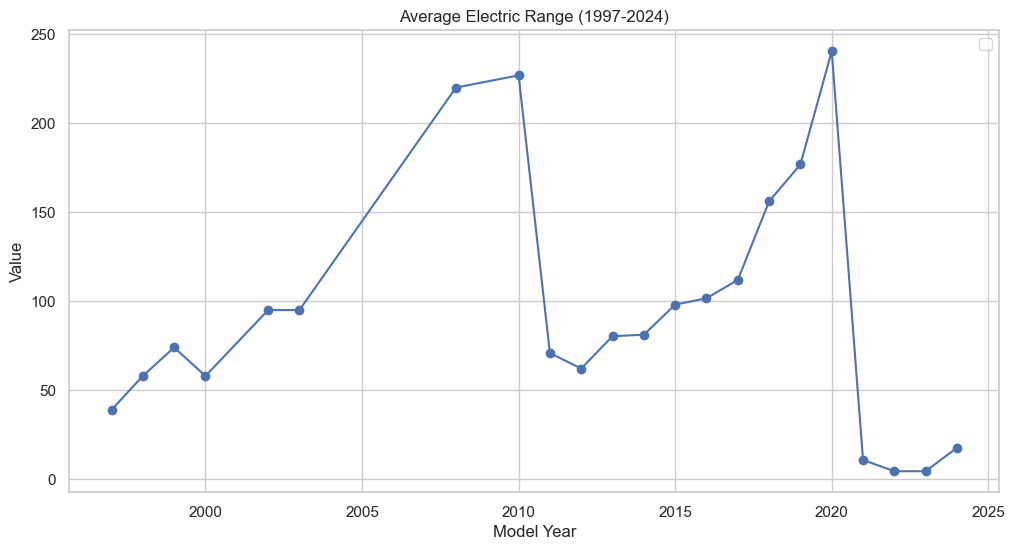

In [173]:
import pandas as pd
# Plotting the average electric range for each year
plt.figure(figsize=(12, 6))
plt.plot(filtered_mean_data1['Model Year'], filtered_mean_data1['Electric Range'], marker='o')
plt.title('Average Electric Range (1997-2024)')
plt.xlabel('Model Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/8s/4xrvxcw11kxdvw115jftrvp80000gn/T/ipykernel_29324/3798192940.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count, y=category, palette='viridis')


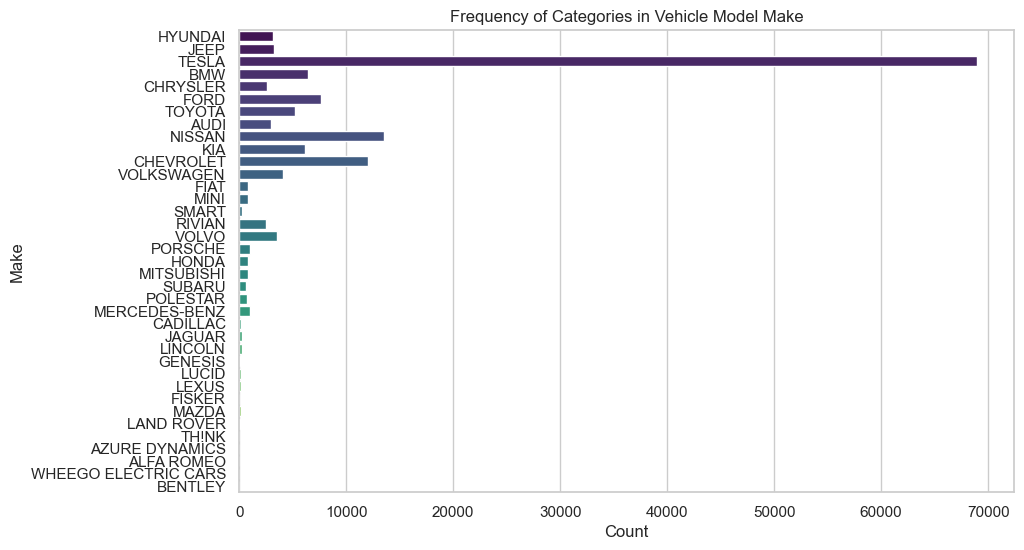

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")
key_of_interest= 'Make'
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=count, y=category, palette='viridis')
plt.title(f'Frequency of Categories in Vehicle Model {key_of_interest}')
plt.xlabel('Count')
plt.ylabel(key_of_interest)
plt.show()

/var/folders/8s/4xrvxcw11kxdvw115jftrvp80000gn/T/ipykernel_29324/33114403.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=states, y=common_vehicles, palette='viridis')


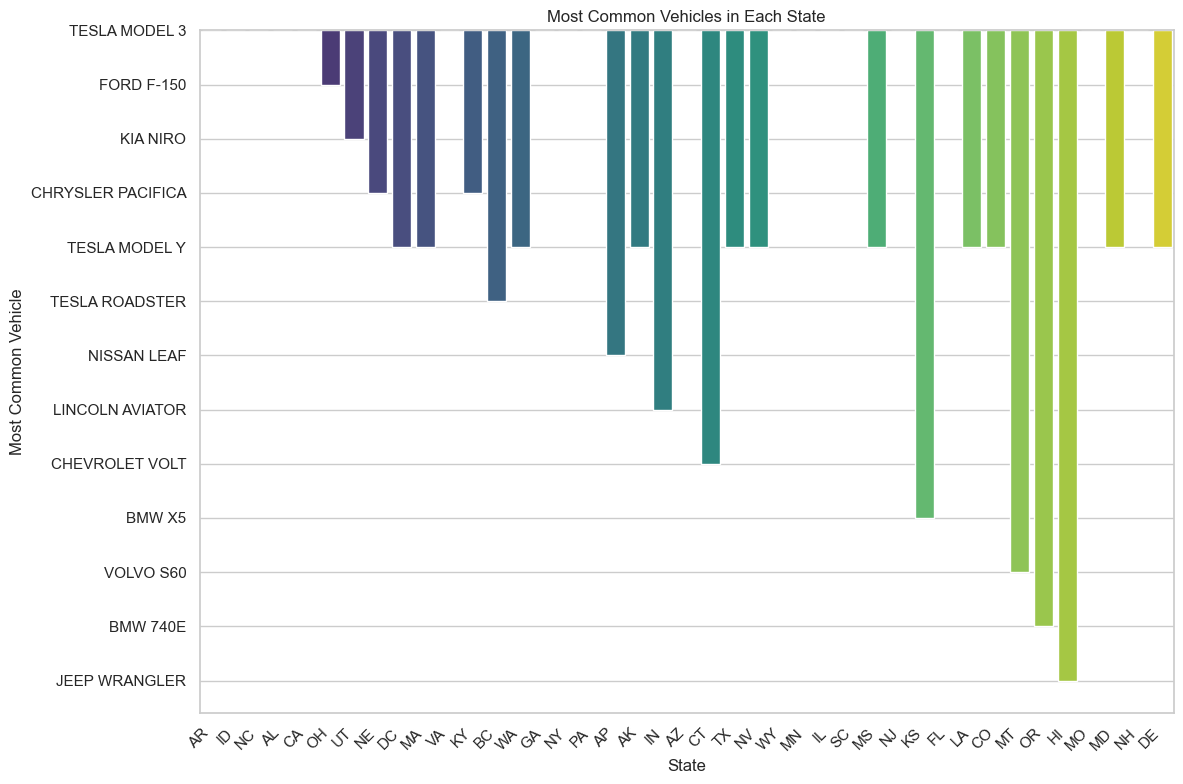

In [175]:
sns.set(style="whitegrid")
# Extract states and their most common vehicles for plotting
states = list(most_common_vehicle_by_state.keys())
common_vehicles = list(most_common_vehicle_by_state.values())

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=states, y=common_vehicles, palette='viridis')
plt.title('Most Common Vehicles in Each State')
plt.xlabel('State')
plt.ylabel('Most Common Vehicle')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

TODO Describe the visualizations in the previous cell


## Part 6 - Conclusion

#### Q1: What is the most common vehicle (model and make) - based on the maximum number of vehicles - found in each state, and how does this trend vary among the maximum number of most common vehicles in different states?

Answer:

* The most common BEV vehicle: TESLA (MODEL S), WA
* The most common PHEV vehicle: TESLA (I3), WA
* Most common vehicles found in each state: visualization #3

The variation in different vehicles vary significantly from state to state. As shown in visualization #3, TESLA is a common vehicle in multiple states. This is further supported by visualization #2, in which TESLA carries the maximum count of vehicle in our entire dataset. 

#### Q2: How has an electric vehicle's range (number of miles an electric vehicle can travel on a fully charged battery or a single charge) changed throughout the years (1997-2024)? Has this range improved or worsened? 

Answer: 

* As shown in visualization #1, the electric vehicle's range fluctuates throughout the years. A potential cause for this may be due to the fact that the dataset may contain different sample sizes for each year, which could lead to inaccuracy and may not be a true reflection of the year's actual electric vehicle range value. 
* This is especially evident between years 2020-2024, in which there is a sharp drop in the electric vehicle range. Considering COVID-19 may have had a huge impact on the electric vehicle market between 2020-2024, it is also important to note that the year 2024 has not begun yet, which further supports the concept of imabalances in sample sizes, leading to inaccuracies. 
* Generally, however, if we indivdually compared the electric vehicle range values of 2000 and 2020 in visualization #1, the value increase is significant, implying an overall improvement in electric vehicle range.


## Part 7 - Heights and Weights

Correlation Coefficient Matrix
 [[1.         0.49597776]
 [0.49597776 1.        ]]

Correlation Coefficient 0.49598


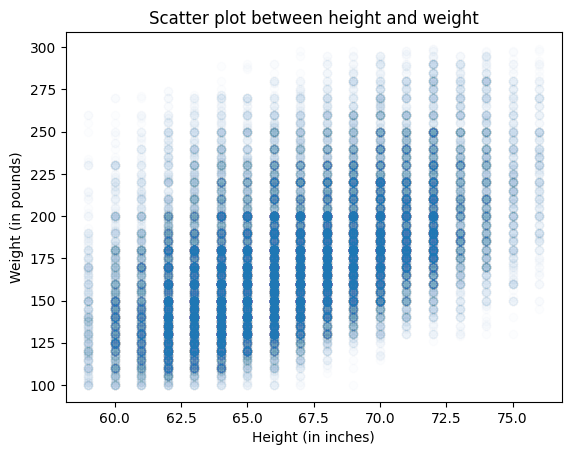

In [1]:
# Height column name in dataset: HEIGHTTC_A 
# Weight column name in dataset: WEIGHTLBTC_A 
import csv
import numpy as np
import matplotlib.pyplot as plt

file_path = "data/raw/adult19.csv"

heights = []
weights = []

# Read the CSV file and extract height and weight values
with open(file_path, mode='r', encoding='utf-8', errors='ignore') as file:
    reader = csv.DictReader(file)
    for row in reader:
       #original length of variables before data cleaning: 31997
       if float(row['HEIGHTTC_A'])<77 and float(row['WEIGHTLBTC_A'])<300:
        #length of variables after data cleaning: 29170
        weights.append(float(row['WEIGHTLBTC_A']))
        heights.append(float(row['HEIGHTTC_A']))

# Calculate and print correlation coefficient
correlation_matrix = np.corrcoef(heights, weights)
print("Correlation Coefficient Matrix\n", correlation_matrix)
print("\nCorrelation Coefficient",round(correlation_matrix[0][1],5))

# Scatter plot
plt.scatter(heights, weights, alpha=0.01)
plt.title('Scatter plot between height and weight')
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.show()

Jitter:
- avoids overplotting when data points in a discrete set will overlap
- slightly alters the data point by adding a slight amount of noise
- helps with visualizing the data better and so that discrete data points can be easily identified
- with the slight modification of the points, the positions of each point will no longer overlap perfectly
- this will allow the density of the points to show more clearly

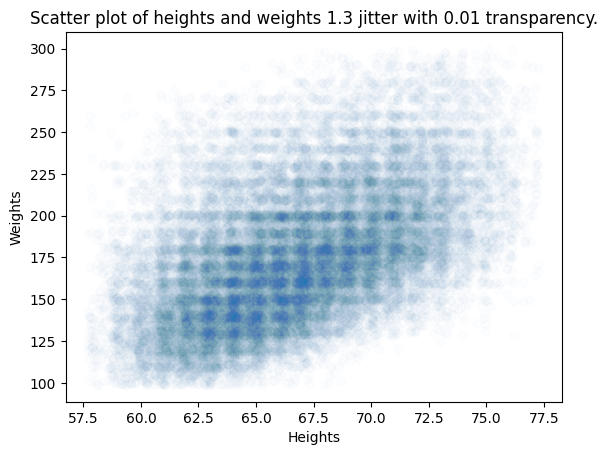

In [2]:
# Adding jitter
import random
jitter = 1.3
heights = [h + random.uniform(-jitter, jitter) for h in heights]
weights = [w + random.uniform(-jitter, jitter) for w in weights]
plt.scatter(heights,weights, alpha=0.01)
plt.title("Scatter plot of heights and weights 1.3 jitter with 0.01 transparency.")
plt.xlabel("Heights")
plt.ylabel("Weights")
plt.show()